In [1]:
import math
from collections import Counter
from matplotlib import pyplot as plt
import random
import pandas as pd
import os
import sys
sys.path.append("../data_science_package")
import csv
import dateutil.parser
from Statistics import correlation
from collections import Counter
import numpy as np

In this module, we are going to explore the trend of an each individual car brand and its price drop with the respect to the mileage and manufactured year. First, I have to collect data from outside source. I am using '1.2 Million Used Car Listings' provided by Evan Payne from Kaggle.

In [2]:
data = []

In [3]:
data = pd.read_csv("../DataSet/true_car_listings.csv")

Credit: https://www.kaggle.com/jpayne/852k-used-car-listings/version/2#true_car_listings.csv

In [4]:
data.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [5]:
print('Total length of the data : %d' %len(data['Make']))

Total length of the data : 852122


In [6]:
print('Total number of the car brands : %d' %len(Counter(data['Make'])))

Total number of the car brands : 58


In [7]:
Counter(data['Make'])

Counter({'AM': 19,
         'Acura': 11049,
         'Alfa': 44,
         'Aston': 149,
         'Audi': 12618,
         'BMW': 32415,
         'Bentley': 367,
         'Buick': 12491,
         'Cadillac': 15047,
         'Chevrolet': 102268,
         'Chrysler': 16357,
         'Dodge': 34368,
         'FIAT': 1782,
         'Ferrari': 345,
         'Fisker': 19,
         'Ford': 110432,
         'Freightliner': 11,
         'GMC': 29008,
         'Genesis': 141,
         'Geo': 2,
         'HUMMER': 949,
         'Honda': 50193,
         'Hyundai': 35837,
         'INFINITI': 12258,
         'Isuzu': 76,
         'Jaguar': 2200,
         'Jeep': 40373,
         'Kia': 28636,
         'Lamborghini': 121,
         'Land': 4096,
         'Lexus': 20641,
         'Lincoln': 7120,
         'Lotus': 42,
         'MINI': 4375,
         'Maserati': 1047,
         'Maybach': 10,
         'Mazda': 13365,
         'McLaren': 47,
         'Mercedes-Benz': 26323,
         'Mercury': 1076,
       

There are about 80,000 individual data values about used cars, and 58 different car brands in the dataset. In order to make this data more general and useful, popular car brands are selected. According to 2018 US Automotive Brand Rankings – YTD, we are going to use only top 18 car brands according to their market share in the car industry.

credit: http://www.goodcarbadcar.net/2018/10/u-s-auto-sales-brand-rankings-september-2018-ytd/

In [8]:
top_brands = pd.read_csv("../DataSet/us_top_18_brands_2018.csv")

In [9]:
top_brands

,Brand,Month,Change,YTD,YTD Change,Month Share,YTD Share
0,Ford,"188,328",-11.52,"1,808,326",-1.81,13.07,13.87
1,Toyota,"178,501",-10.94,"1,706,410",5.88,12.39,13.09
2,Chevrolet,"159,171",-20.34,"1,486,515",-1.96,11.05,11.40
3,Honda,"119,157",-8.18,"1,092,247",-2.08,8.27,8.38
4,Nissan,"110,283",-13.29,"1,019,433",-5.83,7.65,7.82
5,Jeep,"83,764",14.11,"746,194",19.92,5.81,5.72
6,Subaru,"57,044",3.49,"503,418",5.13,3.96,3.86
7,Hyundai,"56,940",3.02,"492,791",-0.77,3.95,3.78
8,Kia,"51,503",-1.84,"452,042",-1.29,3.57,3.47
9,Ram,"56,447",9.21,"416,661",-0.49,3.92,3.20


In [10]:
data = data.loc[data['Make'].isin(list(top_brands['Brand']))]

In [11]:
data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
11261,6500,2011,74520,Tacoma,WA,WAUSFAFL1BA115313,Audi,A44dr
11262,9791,2009,61473,Chandler,AZ,WAUAF48H79K009975,Audi,A42dr
11263,7495,2006,42065,Norfolk,VA,WAUAF78E46A113560,Audi,A44dr
11264,9100,2006,47500,Columbus,OH,WAUDF78E26A027502,Audi,A44dr
11265,7795,2008,73289,Delray Beach,FL,WAUAF78E98A138571,Audi,A44dr


In [12]:
#resetting indexes from 0 to nth order
data.index = range(len(data))

In [13]:
data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,6500,2011,74520,Tacoma,WA,WAUSFAFL1BA115313,Audi,A44dr
1,9791,2009,61473,Chandler,AZ,WAUAF48H79K009975,Audi,A42dr
2,7495,2006,42065,Norfolk,VA,WAUAF78E46A113560,Audi,A44dr
3,9100,2006,47500,Columbus,OH,WAUDF78E26A027502,Audi,A44dr
4,7795,2008,73289,Delray Beach,FL,WAUAF78E98A138571,Audi,A44dr


In [14]:
Counter(data['Make'])

Counter({'Audi': 12618,
         'BMW': 32415,
         'Chevrolet': 102268,
         'Dodge': 34368,
         'Ford': 110432,
         'GMC': 29008,
         'Honda': 50193,
         'Hyundai': 35837,
         'Jeep': 40373,
         'Kia': 28636,
         'Lexus': 20641,
         'Mazda': 13365,
         'Mercedes-Benz': 26323,
         'Nissan': 66250,
         'Ram': 19808,
         'Subaru': 16428,
         'Toyota': 77786,
         'Volkswagen': 23249})

Now it seems that our data rows only contain the car brands correspondent to the YTD chart.
Since each car brand holds a different data size, I choose 1,000 sample size from each car brand.  

In [15]:
sample_data = pd.DataFrame({'Price': [],
                            'Year': [],
                            'Mileage': [],
                            'Make': []})

In [16]:
j = 0

for i in range(len(data)-2):
    if data['Make'][i] != data['Make'][i+1]:
        sample_data = sample_data.append(data[j:i].sample(n=1000))
        j = i
    if i == len(data)-3:
        sample_data = sample_data.append(data[j:i].sample(n=1000))

In [17]:
#resetting indexes from 0 to nth order
sample_data.index = range(len(sample_data))

In [18]:
sample_data.head()

,City,Make,Mileage,Model,Price,State,Vin,Year
0,Lafayette,Audi,17239.0,A62.0T,36494.0,LA,WAUGFAFC7GN133093,2016.0
1,Stuart,Audi,31517.0,Q73.0T,43491.0,FL,WA1DGAFE2FD006254,2015.0
2,Seattle,Audi,21596.0,S3Premium,31400.0,WA,WAUBFGFFXF1139287,2015.0
3,Seattle,Audi,5510.0,A4Premium,36493.0,WA,WAUANAF46HN017550,2017.0
4,Charlotte,Audi,13023.0,Q3FrontTrak,30990.0,NC,WA1FFCFS5FR001002,2015.0


In [19]:
Counter(sample_data['Make'])

Counter({'Audi': 1000,
         'BMW': 1000,
         'Chevrolet': 1000,
         'Dodge': 1000,
         'Ford': 1000,
         'GMC': 1000,
         'Honda': 1000,
         'Hyundai': 1000,
         'Jeep': 1000,
         'Kia': 1000,
         'Lexus': 1000,
         'Mazda': 1000,
         'Mercedes-Benz': 1000,
         'Nissan': 1000,
         'Ram': 1000,
         'Subaru': 1000,
         'Toyota': 1000,
         'Volkswagen': 1000})

After sampling with the size n = 1,000, we can see that each car brands now has sample data of 1,000.

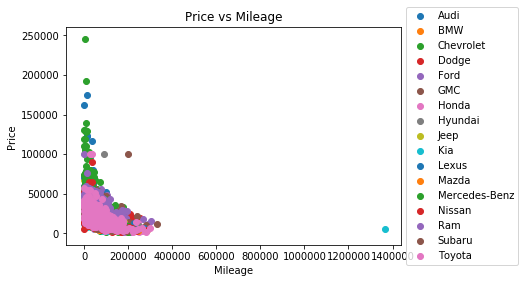

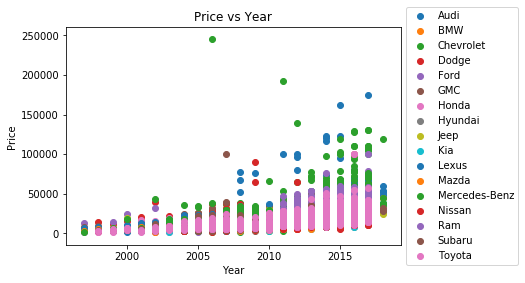

In [20]:
r = 0
correlation_list = []
for i in range(len(sample_data)-2):
    
    xs_mileage = []
    ys_price = []
    
    if sample_data['Make'][i] != sample_data['Make'][i+1] or i == len(data)-3:
        
        xs_mileage = [sample_data['Mileage'][m]
         for m in range(r,i)]

        ys_price = [sample_data['Price'][j]
         for j in range(r,i)]
        
        r = i
        
        correlation_list.append([sample_data['Make'][r],np.corrcoef(xs_mileage, ys_price)[0][1]])
        plt.scatter(xs_mileage,ys_price,label = sample_data['Make'][r])
        plt.title('Price vs Mileage')
        plt.xlabel('Mileage')
        plt.ylabel('Price')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

r = 0
for i in range(len(sample_data)-2):

    xs_year = []
    ys_price = []
    
    if sample_data['Make'][i] != sample_data['Make'][i+1] or i == len(data)-3:
        
        xs_year = [sample_data['Year'][k]
         for k in range(r,i)]

        ys_price = [sample_data['Price'][j]
         for j in range(r,i)]
        
        r = i
        
        correlation_list.append([sample_data['Make'][r],np.corrcoef(xs_year, ys_price)[0][1]])
        
        plt.scatter(xs_year,ys_price,label = sample_data['Make'][r])
        plt.title('Price vs Year')
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


However, it seems that there are several outliers disturbing the scale of our scatter plots. We can improve on this by replacing outliers with the median data.

In [21]:
from numpy.polynomial import Polynomial

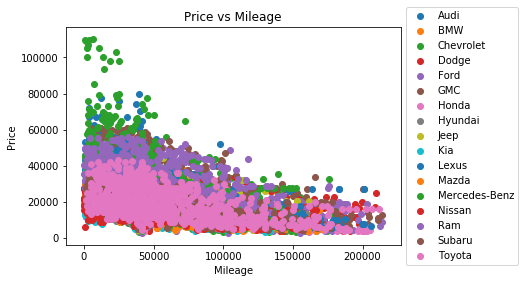

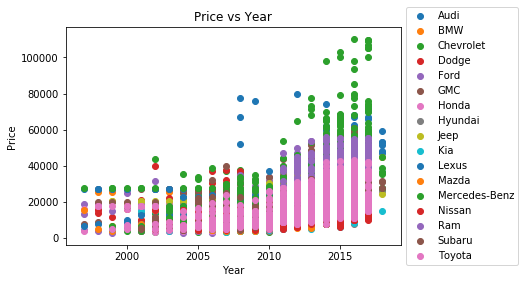

In [22]:
r = 0
gradient_mileage = []
for i in range(len(sample_data)-2):
    
    xs_mileage = []
    ys_price = []
    
    if sample_data['Make'][i] != sample_data['Make'][i+1] or i == len(data)-3:
        
        xs_mileage = [sample_data['Mileage'][m]
         for m in range(r,i)]

        #setting a boundary which contains 98% of the data
        q_lower_mileage = np.percentile(xs_mileage, 1)
        q_higher_mileage = np.percentile(xs_mileage, 99)
        
        for p in range(len(xs_mileage)):
            if xs_mileage[p] > q_higher_mileage or xs_mileage[p] < q_lower_mileage:
                xs_mileage[p] = np.median(xs_mileage)
                
        ys_price = [sample_data['Price'][j]
         for j in range(r,i)]
        
        q_lower_price = np.percentile(ys_price, 1)
        q_higher_price = np.percentile(ys_price, 99)
        
        for p in range(len(ys_price)):
            if ys_price[p] > q_higher_price or ys_price[p] < q_lower_price:
                ys_price[p] = np.median(ys_price)
        
        r = i
        
        gradient_mileage.append([np.polyfit(xs_mileage,ys_price,1),sample_data['Make'][r]])
        plt.scatter(xs_mileage,ys_price,label = sample_data['Make'][r])
        plt.title('Price vs Mileage')
        plt.xlabel('Mileage')
        plt.ylabel('Price')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

r = 0
gradient_year = []
for i in range(len(sample_data)-2):

    xs_year = []
    ys_price = []
    
    if sample_data['Make'][i] != sample_data['Make'][i+1] or i == len(data)-3:
        
        xs_year = [sample_data['Year'][k]
         for k in range(r,i)]
        

        ys_price = [sample_data['Price'][j]
         for j in range(r,i)]
        
        q_lower_price = np.percentile(ys_price, 1)
        q_higher_price = np.percentile(ys_price, 99)
        
        for p in range(len(ys_price)):
            if ys_price[p] > q_higher_price or ys_price[p] < q_lower_price:
                ys_price[p] = np.median(ys_price)
        
        r = i
        
        correlation_list.append([sample_data['Make'][r],np.corrcoef(xs_year, ys_price)[0][1]])
        
        gradient_year.append([np.polyfit(xs_year,ys_price,1),sample_data['Make'][r]])
        plt.scatter(xs_year,ys_price,label = sample_data['Make'][r])
        plt.title('Price vs Year')
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

By replacing several outliers with median values, the graph appears to be trimed(although it is still chaotic since 18 scatter plots were on the same axis)...
Now we have to get a best fit line which describes the trend of the data. Since I do not want my graph to overfit, I am going to compare 1st, 2nd and 3rd order of best fit line.

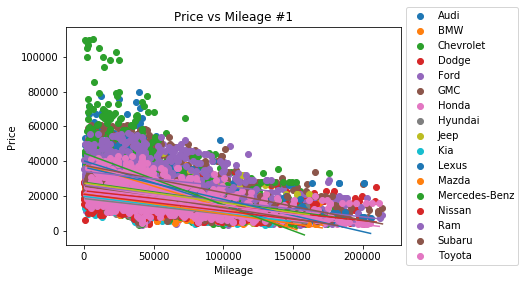

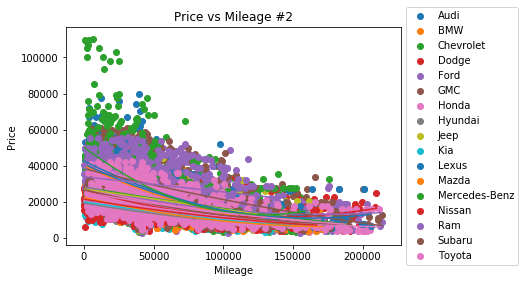

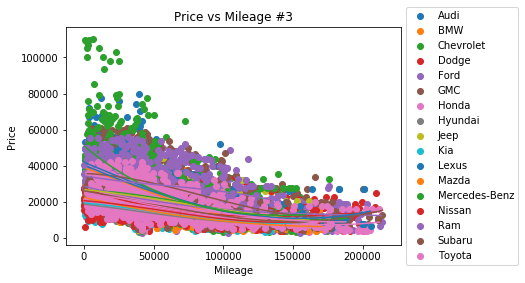

In [23]:
r = 0
for i in range(len(sample_data)-2):
    
    xs_mileage = []
    ys_price = []
    
    if sample_data['Make'][i] != sample_data['Make'][i+1] or i == len(data)-3:
        
        xs_mileage = [sample_data['Mileage'][m]
         for m in range(r,i)]

        #setting a boundary which contains 98% of the data
        q_lower_mileage = np.percentile(xs_mileage, 1)
        q_higher_mileage = np.percentile(xs_mileage, 99)
        
        for p in range(len(xs_mileage)):
            if xs_mileage[p] > q_higher_mileage or xs_mileage[p] < q_lower_mileage:
                xs_mileage[p] = np.median(xs_mileage)
                
        ys_price = [sample_data['Price'][j]
         for j in range(r,i)]
        
        q_lower_price = np.percentile(ys_price, 1)
        q_higher_price = np.percentile(ys_price, 99)
        
        for p in range(len(ys_price)):
            if ys_price[p] > q_higher_price or ys_price[p] < q_lower_price:
                ys_price[p] = np.median(ys_price)
        
        r = i
        
        plt.scatter(xs_mileage,ys_price,label = sample_data['Make'][r])
        p = Polynomial.fit(xs_mileage, ys_price, 1)
        plt.plot(*p.linspace())
        plt.title('Price vs Mileage #1')
        plt.xlabel('Mileage')
        plt.ylabel('Price')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
        
r = 0
for i in range(len(sample_data)-2):
    
    xs_mileage = []
    ys_price = []
    
    if sample_data['Make'][i] != sample_data['Make'][i+1] or i == len(data)-3:
        
        xs_mileage = [sample_data['Mileage'][m]
         for m in range(r,i)]

        #setting a boundary which contains 98% of the data
        q_lower_mileage = np.percentile(xs_mileage, 1)
        q_higher_mileage = np.percentile(xs_mileage, 99)
        
        for p in range(len(xs_mileage)):
            if xs_mileage[p] > q_higher_mileage or xs_mileage[p] < q_lower_mileage:
                xs_mileage[p] = np.median(xs_mileage)
                
        ys_price = [sample_data['Price'][j]
         for j in range(r,i)]
        
        q_lower_price = np.percentile(ys_price, 1)
        q_higher_price = np.percentile(ys_price, 99)
        
        for p in range(len(ys_price)):
            if ys_price[p] > q_higher_price or ys_price[p] < q_lower_price:
                ys_price[p] = np.median(ys_price)
        
        r = i
        
        plt.scatter(xs_mileage,ys_price,label = sample_data['Make'][r])
        p = Polynomial.fit(xs_mileage, ys_price, 2)
        plt.plot(*p.linspace())
        plt.title('Price vs Mileage #2')
        plt.xlabel('Mileage')
        plt.ylabel('Price')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
        
        
r = 0
for i in range(len(sample_data)-2):
    
    xs_mileage = []
    ys_price = []
    
    if sample_data['Make'][i] != sample_data['Make'][i+1] or i == len(data)-3:
        
        xs_mileage = [sample_data['Mileage'][m]
         for m in range(r,i)]

        #setting a boundary which contains 98% of the data
        q_lower_mileage = np.percentile(xs_mileage, 1)
        q_higher_mileage = np.percentile(xs_mileage, 99)
        
        for p in range(len(xs_mileage)):
            if xs_mileage[p] > q_higher_mileage or xs_mileage[p] < q_lower_mileage:
                xs_mileage[p] = np.median(xs_mileage)
                
        ys_price = [sample_data['Price'][j]
         for j in range(r,i)]
        
        q_lower_price = np.percentile(ys_price, 1)
        q_higher_price = np.percentile(ys_price, 99)
        
        for p in range(len(ys_price)):
            if ys_price[p] > q_higher_price or ys_price[p] < q_lower_price:
                ys_price[p] = np.median(ys_price)
        
        r = i
        
        plt.scatter(xs_mileage,ys_price,label = sample_data['Make'][r])
        p = Polynomial.fit(xs_mileage, ys_price, 3)
        plt.plot(*p.linspace())
        plt.title('Price vs Mileage #3')
        plt.xlabel('Mileage')
        plt.ylabel('Price')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

For the fit line 2 and 3, both graphs showed an increase after passing their local minimum point. Therefore quadratic and cubic best fit line will not be considered for now. Although exponential decay graph seems to fit better than linear, for now I am going to use linear fit line to demonstrate how well or bad it can get.

In [24]:
gradient_mileage

[[array([-2.52308734e-01,  4.01319503e+04]), 'Audi'],
 [array([-2.44164426e-01,  3.78021648e+04]), 'BMW'],
 [array([-1.11734020e-01,  2.78360444e+04]), 'Chevrolet'],
 [array([-8.54222312e-02,  2.28719605e+04]), 'Dodge'],
 [array([-9.07202249e-02,  2.60416453e+04]), 'Ford'],
 [array([-1.57470009e-01,  3.76087492e+04]), 'GMC'],
 [array([-9.16737451e-02,  2.18836392e+04]), 'Honda'],
 [array([-8.87444701e-02,  1.84105929e+04]), 'Hyundai'],
 [array([-1.12831794e-01,  2.73396332e+04]), 'Jeep'],
 [array([-9.64733381e-02,  1.96741028e+04]), 'Kia'],
 [array([-1.85251929e-01,  3.65012977e+04]), 'Lexus'],
 [array([-1.14464252e-01,  2.11603672e+04]), 'Mazda'],
 [array([-2.97509472e-01,  4.45932143e+04]), 'Mercedes-Benz'],
 [array([-9.51235592e-02,  2.08976188e+04]), 'Nissan'],
 [array([-8.39179162e-02,  3.39897172e+04]), 'Ram'],
 [array([-1.24067126e-01,  2.55522204e+04]), 'Subaru'],
 [array([-1.00575603e-01,  2.45117051e+04]), 'Toyota']]

In [25]:
from pylab import rcParams

In [26]:
def bar_price_mileage(c):
    rcParams['figure.figsize'] = 20, 10
    M_Data = pd.DataFrame({'price': [(gradient_mileage[i][0][1]+gradient_mileage[i][0][0]*c)/gradient_mileage[i][0][1]*100
                                    for i in range(len(gradient_mileage))]})
    M_Data.index = [gradient_mileage[i][1]
                   for i in range(len(gradient_mileage))]
    
    M_Data = M_Data.sort_values(by='price',ascending=True)
    
    fig, ax = plt.subplots()
   
    ax.bar(M_Data.index, M_Data["price"], color="C0")
    plt.ylim([0,100])
    plt.ylabel('Expected percentage price remaining')
    ax.tick_params(axis="y", colors="C0")
    plt.show()

Since we have gradeints for each car brand's price-mileage graphs, we can estimate the price drop with respect to mileage.

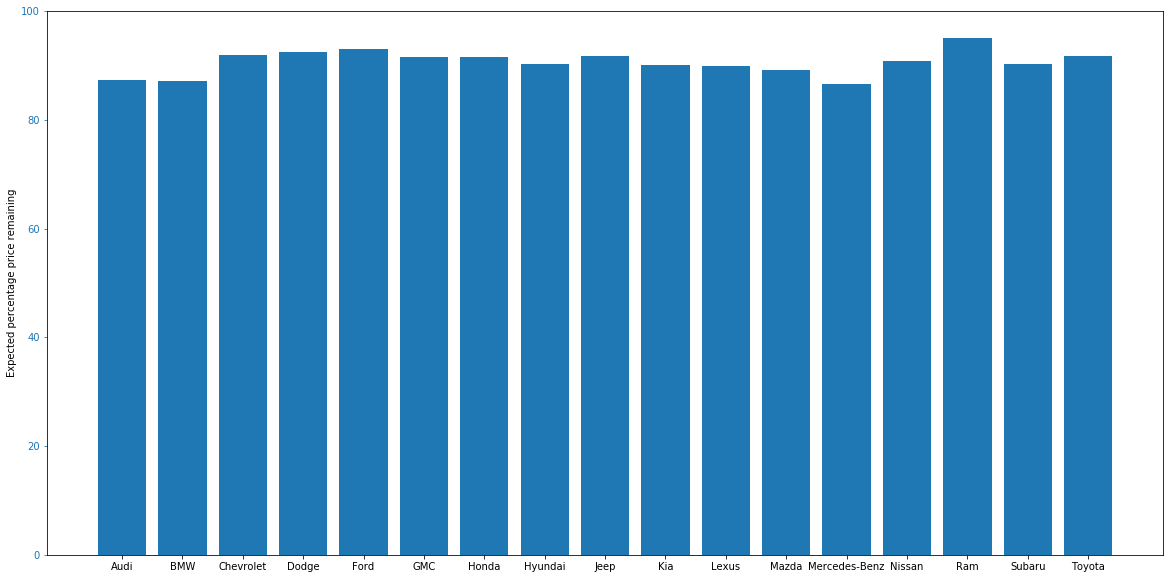

In [27]:
bar_price_mileage(20000)

Also, by adjusting a slider, it is possible to see the result at specific desired mileage.

In [28]:
import ipywidgets as wg
from IPython.display import display

In [29]:
c_slide = wg.FloatSlider(value = 10000, min = 3000, max = 130000, step = 1500,description = 'Mileage')

In [30]:
wg.interact(bar_price_mileage, c = c_slide)

interactive(children=(FloatSlider(value=10000.0, description='Mileage', max=130000.0, min=3000.0, step=1500.0), Output()), _dom_classes=('widget-interact',))

<function __main__.bar_price_mileage>

By adjusting the slider, we can estimate the expected percentage price remaining.

# Conclusion

### Worst Top 3 car brands to